# Moving Average Prediction
### Checking sufficient imports

In [4]:
#numpy
import numpy as np
#matplotlib
from matplotlib import pyplot as plt
#sklearn
from sklearn.metrics import mean_squared_error
#pandas
import pandas as pd

## Reading dataset
### This is where we read the dataset from csv file specifically the first column(PM10) with time index for each measurement

In [111]:
dataset = pd.read_csv("merenja_karpos.csv")
dataset_frequency_pm10 = dataset[["PM10"]]
print(dataset.head(10))
print(dataset_frequency_pm10.head(10))

             time      PM10     PM25      NO2
0   2/3/2019 1:00  114.1680  76.6211  18.4716
1   2/3/2019 2:00   99.1302  65.8865  16.4128
2   2/3/2019 3:00   84.9147  54.8745  14.6268
3   2/3/2019 4:00   79.4718  52.0033  12.8137
4   2/3/2019 5:00   85.2981  57.4825  11.8227
5   2/3/2019 6:00   94.5229  63.8613  11.7907
6   2/3/2019 7:00  117.9750  78.8359  12.5799
7   2/3/2019 8:00  121.7980  80.9945  11.9556
8   2/3/2019 9:00  102.0870  70.9779  12.8577
9  2/3/2019 10:00   73.3529  57.8651  14.2978
       PM10
0  114.1680
1   99.1302
2   84.9147
3   79.4718
4   85.2981
5   94.5229
6  117.9750
7  121.7980
8  102.0870
9   73.3529


## Frequency
### Originally we have a dataset of measurements every hour but by standard input we can change the frequency of measurement from 1 hour to preferably maximum of every 12 hours.
### Because we have a dataset of 7 days. 
### It would be illogical and a bad prediciton scheme to have the frequency less than 12 hours per measurement.

In [113]:
freq = input()
dataset_pm10_list = list()
def reduce_frequency(some_freq, some_dataset):
    for index in range(0, some_dataset.PM10.count()):
        if index % int(some_freq) == 0:
            dataset_pm10_list.append(dataset_frequency_pm10.PM10.iloc[index])
    dataset_pm10_array = np.array(dataset_pm10_list)
    dataset_pm10 = pd.DataFrame(dataset_pm10_array, columns=['PM10'])
    return dataset_pm10
dataset_pm10 = reduce_frequency(freq, dataset_frequency_pm10)

## Moving Average
### Calculating MA with window of 1, 2 and 3 and a test moving average of window 20 for analyzing purposes

In [114]:
#window 1
moving_average_one = dataset_pm10.rolling(1).mean()
#window 2
moving_average_two = dataset_pm10.rolling(2).mean()
#window 3
moving_average_three = dataset_pm10.rolling(3).mean()
#window 20
moving_average_test = dataset_pm10.rolling(20).mean()

### filling Nan values in dataset
moving_average_two.fillna(0, inplace=True)
moving_average_three.fillna(0, inplace=True)
moving_average_test.fillna(0, inplace=True)

print("MA(1):\n", moving_average_one.head(10))
print("MA(2):\n", moving_average_two[1:].head(10))
print("MA(3):\n", moving_average_three[2:].head(10))
print("MA(20):\n", moving_average_test[20:].head(10))

MA(1):
        PM10
0  114.1680
1   94.5229
2   65.6122
3   22.9738
4   80.2505
5   61.0200
6   64.5627
7   49.5380
8   36.4839
9   26.9530
MA(2):
          PM10
1   104.34545
2    80.06755
3    44.29300
4    51.61215
5    70.63525
6    62.79135
7    57.05035
8    43.01095
9    31.71845
10   26.13155
MA(3):
          PM10
2   91.434367
3   61.036300
4   56.278833
5   54.748100
6   68.611067
7   58.373567
8   50.194867
9   37.658300
10  29.582333
11  30.355800
MA(20):
          PM10
20  39.772205
21  36.009660
22  33.668320
23  34.637105
24  35.053840
25  35.159565
26  35.459560
27  35.101940
28  35.710485
29  39.462685


## Plotting original table of measurements with moving average table

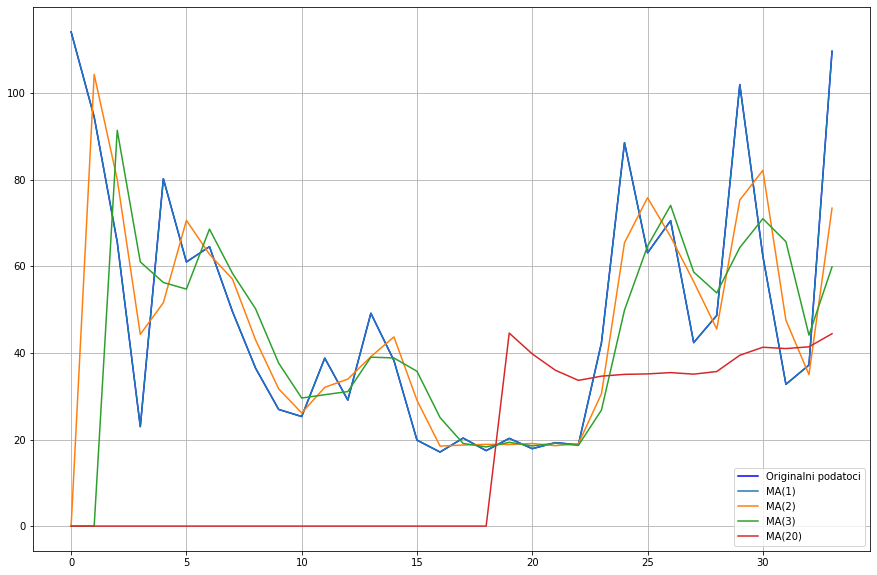

In [115]:
plt.figure(figsize=(15, 10))
plt.grid(True)
plt.plot(dataset_pm10['PM10'], color='blue', label='Originalni podatoci')
plt.plot(moving_average_one['PM10'], label='MA(1)')
plt.plot(moving_average_two['PM10'], label='MA(2)')
plt.plot(moving_average_three['PM10'], label='MA(3)')
plt.plot(moving_average_test['PM10'], label='MA(20)')
plt.legend(loc='best')
plt.show()

## Reduced Transmission
### Method for calculating percentage of reduced transmission for each moving average

In [116]:
threshold = input()
def reduced_transmission(original_dataset, ma_dataset, threshold):
    #list for keeping threshold variation package number percentage
    reduction_list = list()
    threshold_list = threshold_value(threshold)
    for iteration in range (0,len(threshold_list)):
        packages = 0
        for index in range(0, original_dataset.PM10.count()):
            difference = abs(original_dataset.PM10.get(index)-ma_dataset.PM10.get(index))
            if difference <= threshold_list[iteration]:
                packages += 1
        reduction_list.append((100-(packages/original_dataset.PM10.count())*100))
    return reduction_list

def threshold_value(thres):
    threshold_list = list()
    for i in range(0, int(thres)+2, 2):
        threshold_list.append(i)
    return threshold_list

## Plotting lists of reduced transmissions
### Plotting percentage of packages which are not being set due to TBDR or Threshold Based Data Reduction

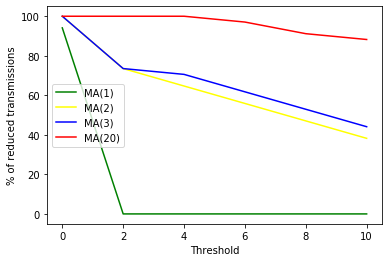

In [117]:
transmission_list = threshold_value(threshold)
plt.subplot(xlabel='Threshold', ylabel='% of reduced transmissions')
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9],labels=transmission_list)

reduced_transmission_list = list()
reduced_transmission_list.append(reduced_transmission(dataset_pm10, moving_average_one, threshold))
reduced_transmission_list.append(reduced_transmission(dataset_pm10, moving_average_two, threshold))
reduced_transmission_list.append(reduced_transmission(dataset_pm10, moving_average_three, threshold))
reduced_transmission_list.append(reduced_transmission(dataset_pm10, moving_average_test, threshold))

plt.plot(reduced_transmission_list[0],color='green', label='MA(1)')
plt.plot(reduced_transmission_list[1],color='yellow', label='MA(2)')
plt.plot(reduced_transmission_list[2],color='blue', label='MA(3)')
plt.plot(reduced_transmission_list[3],color='red', label='MA(20)')
plt.legend(loc='best')
plt.show()

## Calculating consumed energy depending on number of packages sent
### Esn = Ep + Sum(Etr*Bp) - where sum is dependent on Tn
#### Esn – Energy consumed by a sensor.
#### Tn – No. of transmission.
#### Ep – Processing energy.
#### Bp – Bits per sample.
#### Etr – Transmission Energy.
#### Assume we have an ESP8266 running with MQTT Client for package sending. We have a header of 1 byte and a package length of 1 byte for sending the actual air-quality information though SDS011 arguing that we do not take the SDS011 energy consumption in consideration because we are only measuring the energy needed to send the packages themselves.
#### We can use an already measured current from this [research paper](https://www.researchgate.net/publication/329380987_A_comprehensive_study_on_MQTT_as_a_low_power_protocol_for_internet_of_things_application)
#### We can see that the average current is 70.87 mA or rounded to 71 mA
#### If we assume that every package requires 20ms to be sent to the sink, then we have the charge Q=I*T which is 0.071A * 0.02s = 0.00142C
#### This will give us the energy consumed by transmission of the package by this formula E = Q*V because Voltage can be calculated as J/C, but considering we are using ESP8266 module voltage will be 3.3V
#### E=QΔV if we replace the variables with our values we wil get E = 0.00142C * 3.3 V = 0.004686J
#### Our Total Transmission Energy or TEtr for a given standard MQTT package will be 0.004686 Joules
#### Then it is easy to calculate Esn by calculating the number of total packages we are sending
#### For this example we have 169 sets of data coming from our sensor, which will result the Esn being equal to Esn = 169*TEtr = 169 * 0.004686 = 0.791934J
#### We already have calculated the percentage of reduced transmissions per MA. Now we can calculate total reduction of energy by implementing MA algorithm.

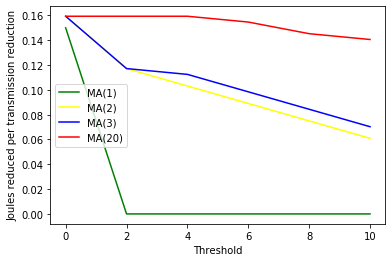

In [118]:
TEtr = 0.004686
packages_total = dataset_pm10.count()
Esn = TEtr*packages_total
def energy_reduction(reduction_list):
    energy_reduction_list = list()
    for i in range(0,4):
        ma_dataset_reduction = list()
        for j in range(0,len(reduction_list[i])):
            ma_dataset_reduction.append(reduction_list[i][j]/100*Esn)
        energy_reduction_list.append(ma_dataset_reduction)
    return energy_reduction_list
energy_reduced = energy_reduction(reduced_transmission_list)
plt.subplot(xlabel='Threshold', ylabel='Joules reduced per transmission reduction')
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9],labels=transmission_list)
plt.plot(energy_reduced[0],color='green', label='MA(1)')
plt.plot(energy_reduced[1],color='yellow', label='MA(2)')
plt.plot(energy_reduced[2],color='blue', label='MA(3)')
plt.plot(energy_reduced[3],color='red', label='MA(20)')
plt.legend(loc='best')
plt.show()

## Plotting Root-mean-square deviation

In [119]:
RMSE_1= np.sqrt(mean_squared_error(dataset_pm10, moving_average_one['PM10']))
RMSE_2= np.sqrt(mean_squared_error(dataset_pm10, moving_average_two['PM10']))
RMSE_3= np.sqrt(mean_squared_error(dataset_pm10, moving_average_three['PM10']))
RMSE_20= np.sqrt(mean_squared_error(dataset_pm10, moving_average_test['PM10']))
print('RMSE_MA(1):', RMSE_1, '\nRMSE_MA(2):', RMSE_2, '\nRMSE_MA(3):', RMSE_3, '\nRMSE_MA(20):', RMSE_20)

RMSE_MA(1): 3.045817500343561e-14 
RMSE_MA(2): 23.531066094892637 
RMSE_MA(3): 31.043305424771596 
RMSE_MA(20): 45.16495007309177


## Conclusion:
### Depending on the moving average algorithm, by using the MA of 3 windows we have the least number of packages sent to the sink, although we are using a test moving average with window of 20 which has the best reduction percentage